In [43]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# File upload code
from google.colab import files
uploaded = files.upload()

Saving Bank data.csv to Bank data.csv


In [3]:
# Loading  the dataset
df = pd.read_csv('Bank data.csv')
df.head()

,RowNumber,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Mombasa,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Nakuru,Female,41,1,83807.86,1,0,1,"112,542.58",0
2,3,15619304,Mombasa,Female,42,8,159660.80,3,1,0,"113,931.57",1
3,4,15701354,Mombasa,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Nakuru,Female,43,2,125510.82,1,1,1,"79,084.10",0


In [5]:
#Dropping unnecessary columns
df.drop(columns = 'RowNumber', inplace = True)

In [6]:
df.head()

,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Mombasa,Female,42,2,0.00,1,1,1,"101,348.88",1
1,15647311,Nakuru,Female,41,1,83807.86,1,0,1,"112,542.58",0
2,15619304,Mombasa,Female,42,8,159660.80,3,1,0,"113,931.57",1
3,15701354,Mombasa,Female,39,1,0.00,2,0,0,"93,826.63",0
4,15737888,Nakuru,Female,43,2,125510.82,1,1,1,"79,084.10",0


In [7]:
# checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  object 
 10  Exited           10000 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 859.5+ KB


In [8]:
# Checking for duplicates
print("No of duplicates :", df.duplicated().sum())

No of duplicates : 0


In [11]:
# Checking for null values
df.isnull().sum()

,0
CustomerId,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [12]:
df.head()

,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Mombasa,Female,42,2,0.00,1,1,1,"101,348.88",1
1,15647311,Nakuru,Female,41,1,83807.86,1,0,1,"112,542.58",0
2,15619304,Mombasa,Female,42,8,159660.80,3,1,0,"113,931.57",1
3,15701354,Mombasa,Female,39,1,0.00,2,0,0,"93,826.63",0
4,15737888,Nakuru,Female,43,2,125510.82,1,1,1,"79,084.10",0


In [13]:
# conducting an overview  descriptive analysis
df.describe()

,CustomerId,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,1.569094e+07,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,0.203700
std,7.193619e+04,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,0.402769
min,1.556570e+07,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,1.562853e+07,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,0.000000
50%,1.569074e+07,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,0.000000
75%,1.575323e+07,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,0.000000
max,1.581569e+07,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,1.000000


# Exploratory Data Analysis

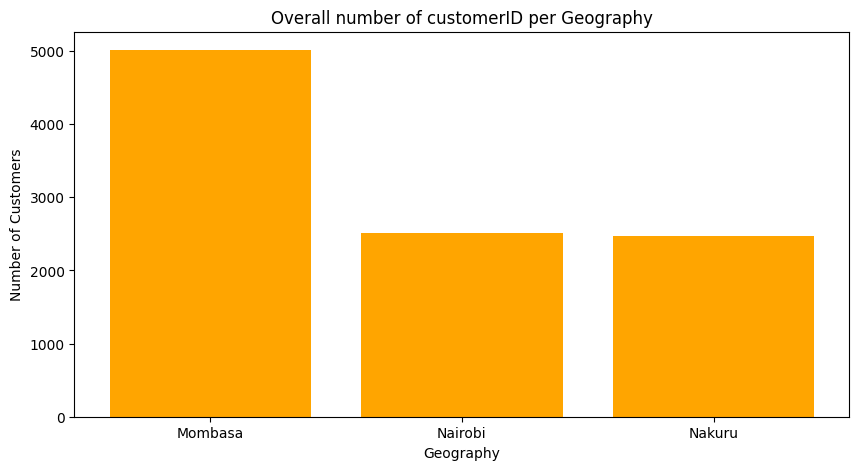

In [27]:
# Overall number of customerID per Geography
Custgeog = df.groupby('Geography').count()['CustomerId']

# Create a graphical representation
plt.figure(figsize = (10,5))
plt.bar(Custgeog.index, Custgeog.values, color = 'Orange')
plt.title('Overall number of customerID per Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.show()



> Mombasa area has the highest number of customers while Nakuru has had the lowerst number of customers.

### Distribution of Gender

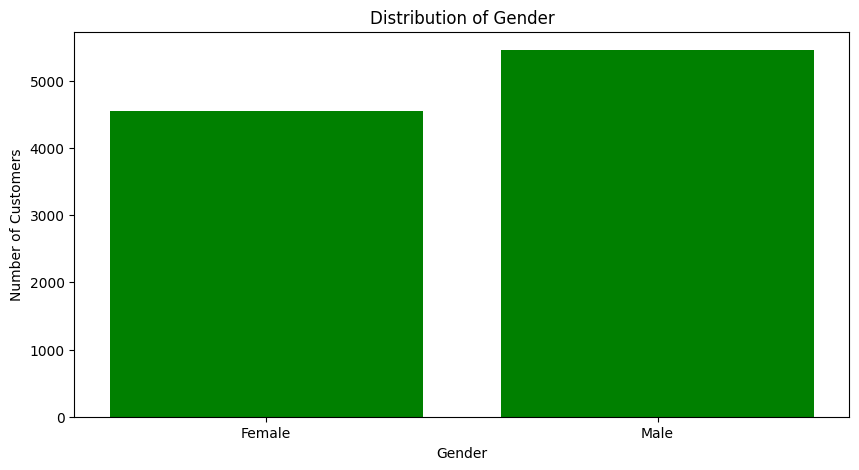

In [31]:
gen = df.groupby('Gender').count()['CustomerId']

# Graphical representation
plt.figure(figsize = (10,5))
plt.bar(gen.index, gen.values, color = 'Green')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

> Many of our customers are Males with a population of () while females are () in number

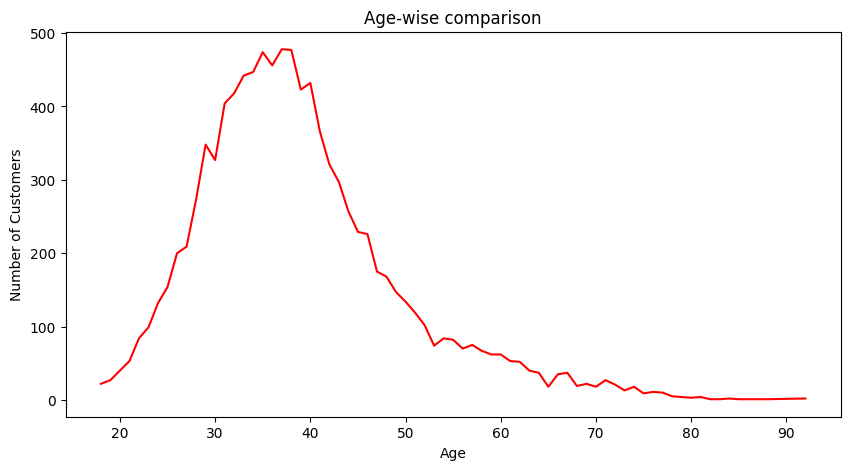

In [34]:
# age-wise comparison
age = df.groupby('Age').count()['CustomerId']

# Graphical representation
plt.figure(figsize = (10,5))
plt.plot(age.index, age.values, color = 'Red')
plt.title('Age-wise comparison')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

> Many customers are aged between 30 and 50 while ages  50+ are few in number indicating that the middle aged are the huge percentage of customers while the old people are the lowest percentages.

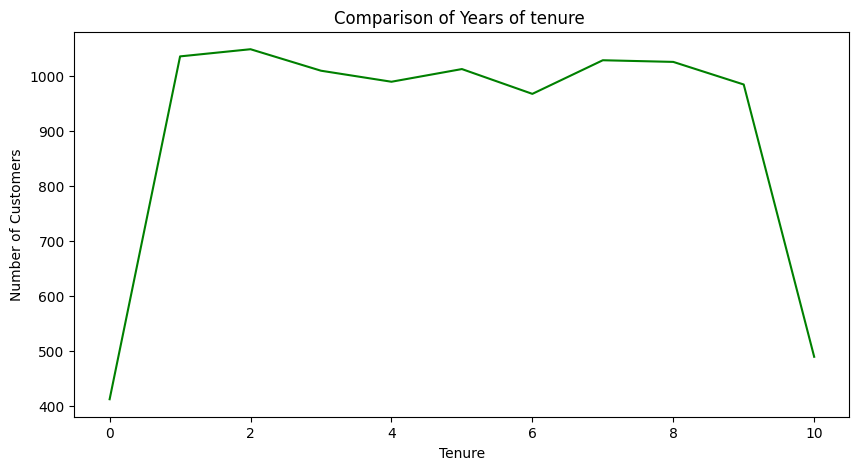

In [36]:
# Comparison of Years of tenure per cusomers

tenure = df.groupby('Tenure').count()['CustomerId']

# Graphical representation
plt.figure(figsize = (10,5))
plt.plot(tenure.index, tenure.values, color = 'Green')
plt.title('Comparison of Years of tenure ')
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.show()

> Many customers uptake the products with few numbers of tenure while the highest number of tenure being 10 years highlights a sharp drop of customers

In [58]:
# prompt: pick the numeric featues only

numeric_features = df.select_dtypes(include=np.number)
numeric_features.columns

numeric_features.drop(columns = 'Exited', inplace = True)



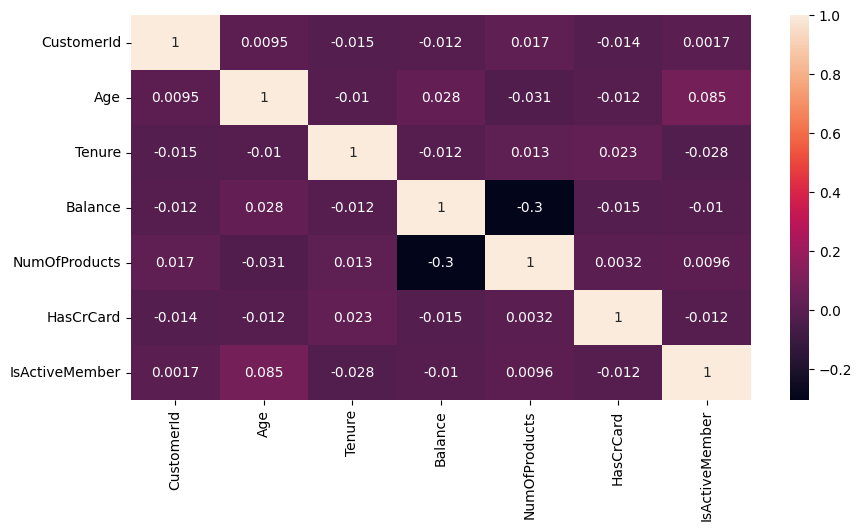

In [64]:
# Correlation plot

plt.figure(figsize = (10,5))
sns.heatmap(numeric_features.corr(), annot = True)
plt.show()

> No multicolinearlity was highlighted indicating that all is well therefore each feature is independent on its own.